In [10]:
import jhu
import pandas as pd
import matplotlib.pyplot as plt


def load_state(state='MA'):
    df = pd.read_csv('states-daily.csv')
    df.date = pd.to_datetime(df.date, format='%Y%m%d')
    df = df.set_index('date')
    df = df.sort_index()
    return df[df.state==state].positive.sort_index()

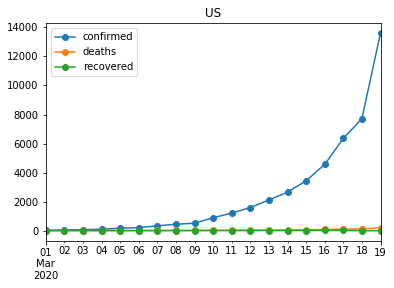

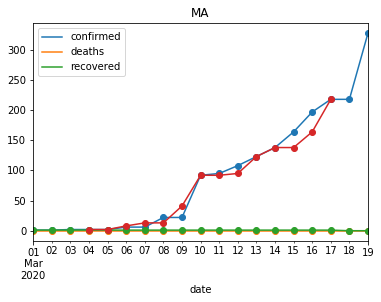

In [18]:
US = jhu.load_us()

start = pd.Timestamp('2020-03-01')

US['tot'][start:].plot(style='o-')
plt.title('US')
#plt.yscale('log')
plt.show()

US['MA'][start:].plot(style='o-')
plt.title('MA')
#plt.yscale('log')

MA = load_state('MA')
MA.plot(style='o-')
plt.show()

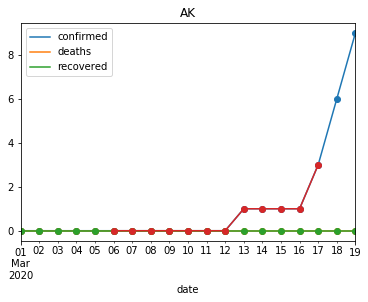

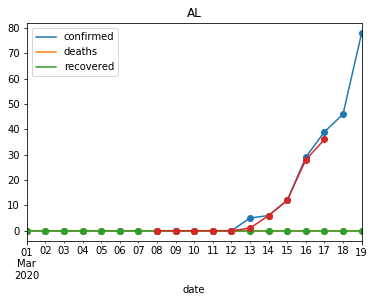

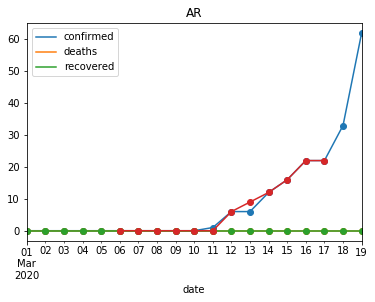

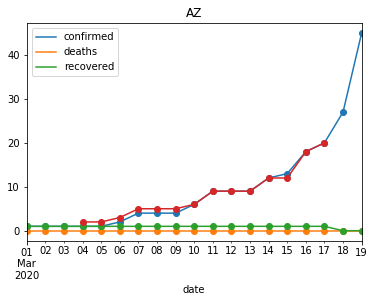

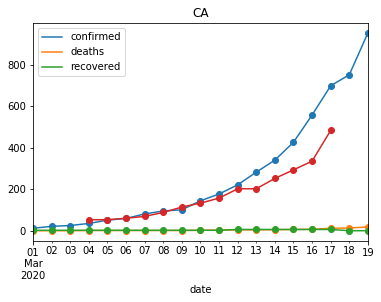

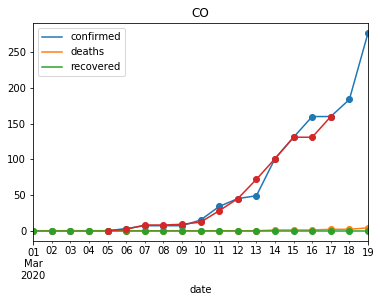

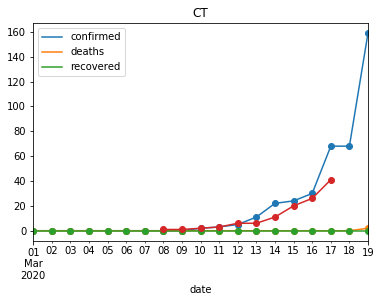

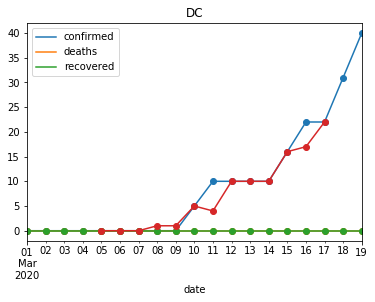

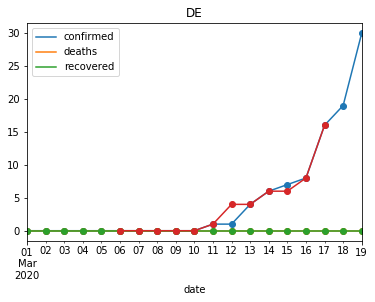

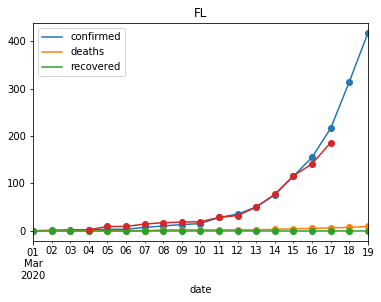

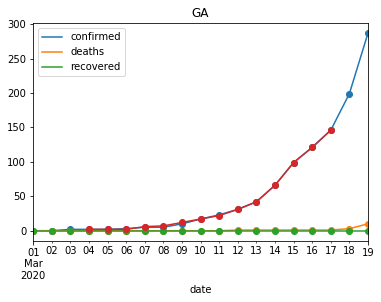

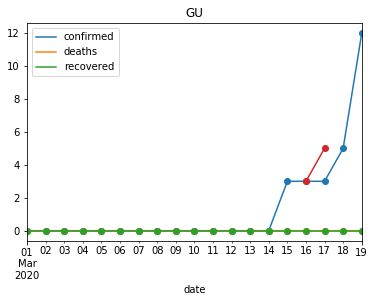

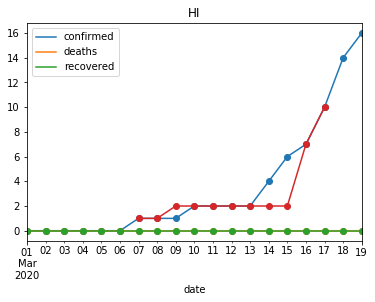

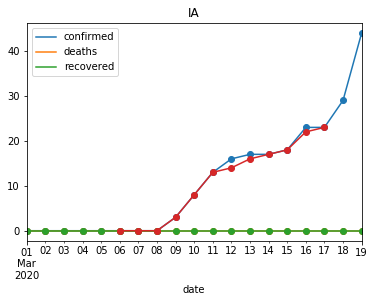

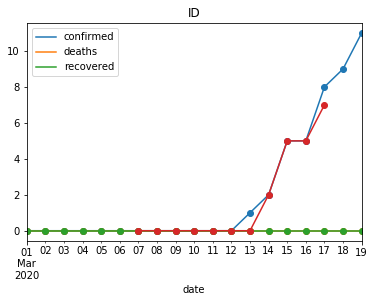

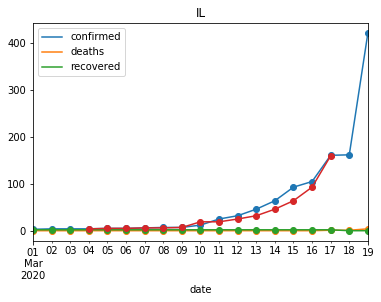

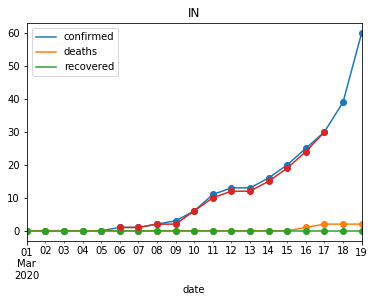

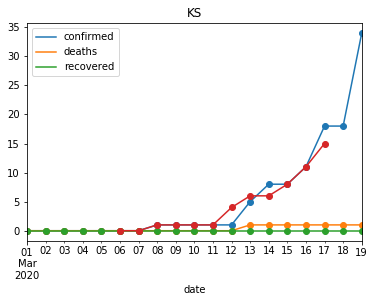

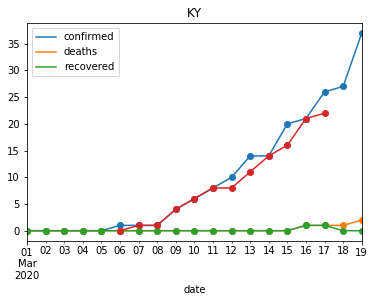

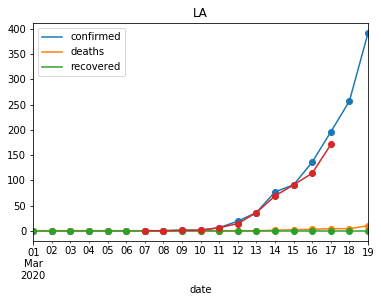

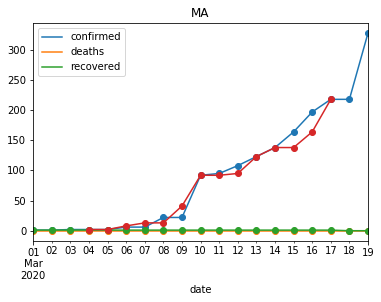

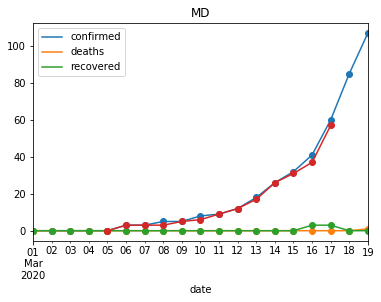

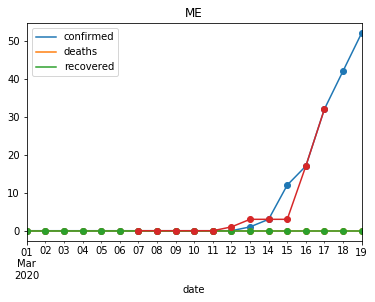

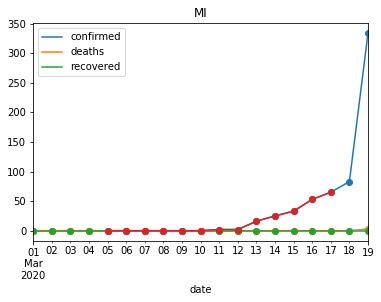

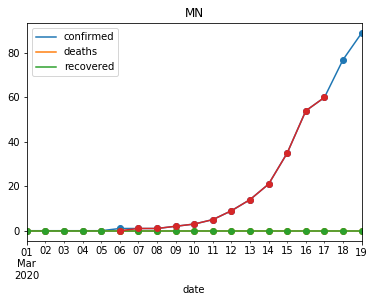

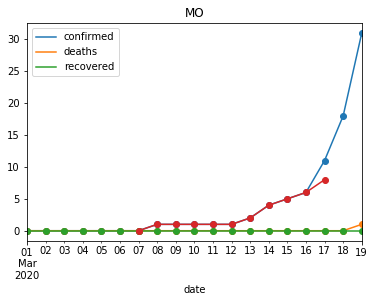

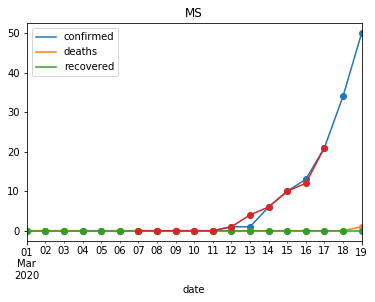

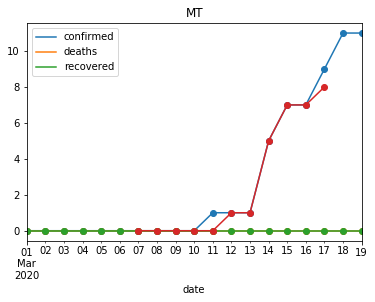

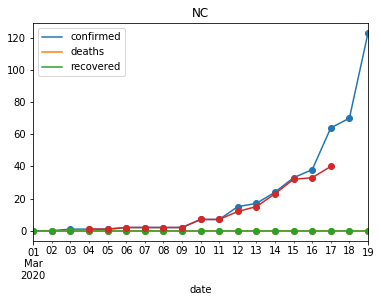

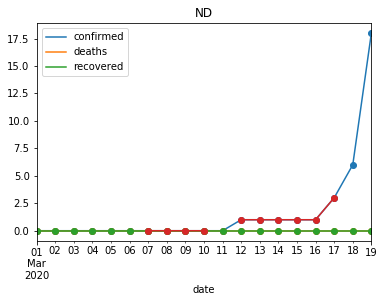

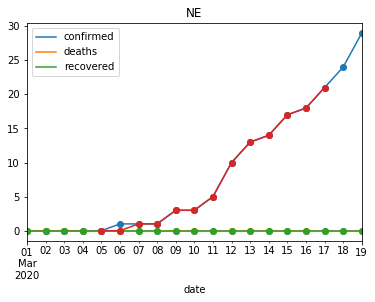

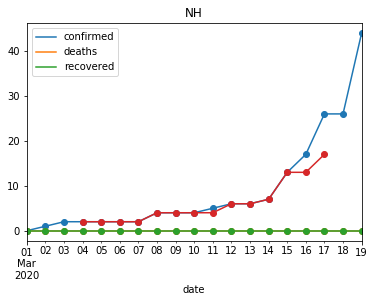

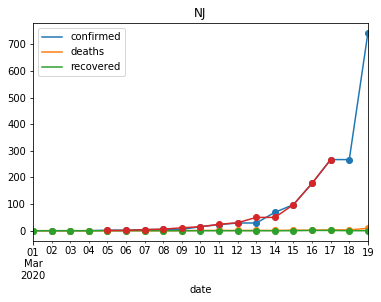

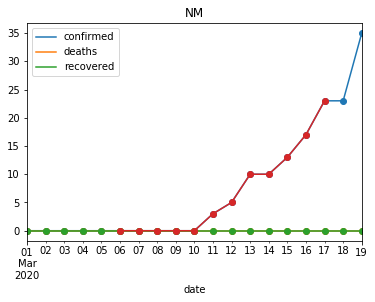

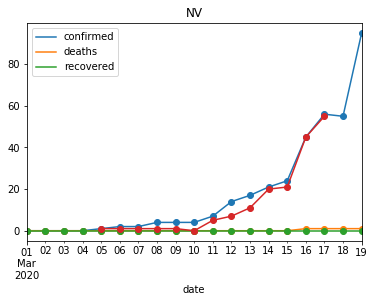

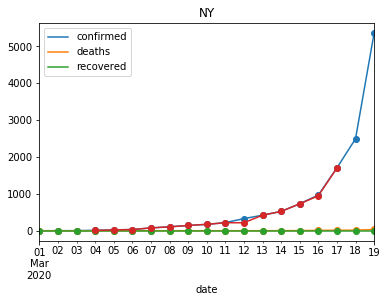

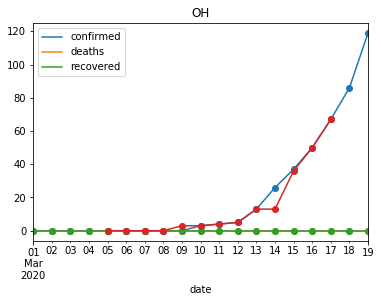

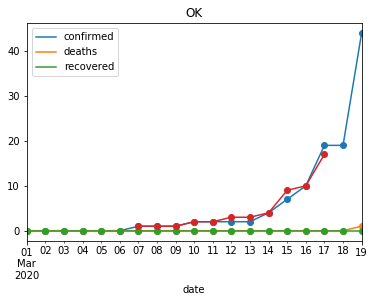

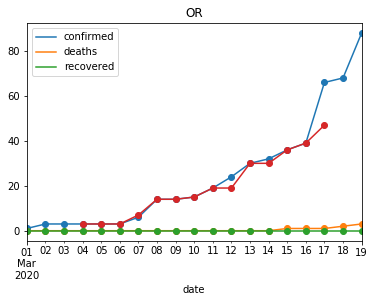

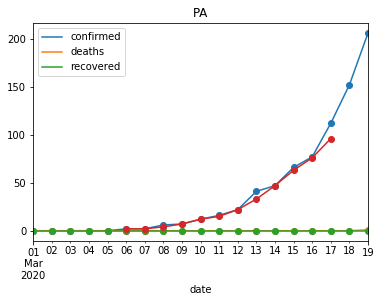

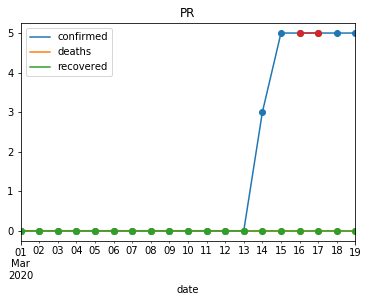

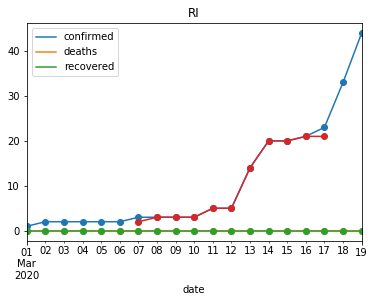

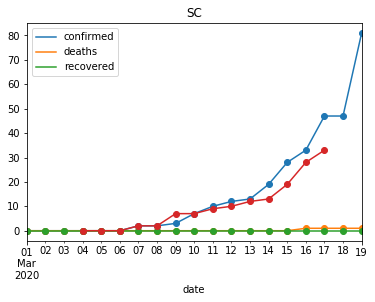

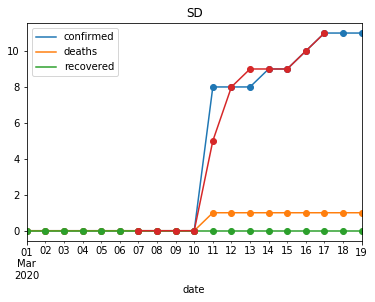

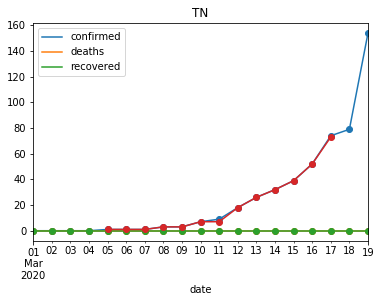

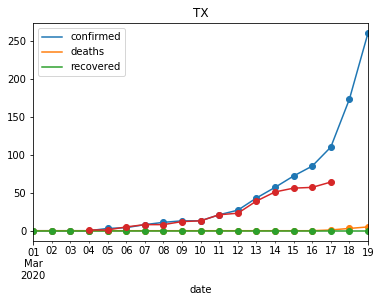

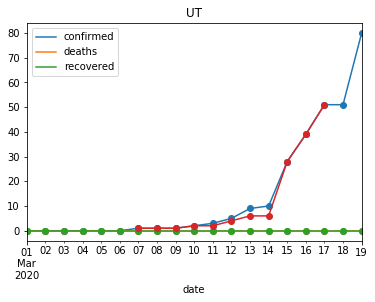

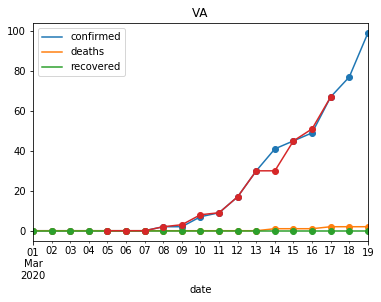

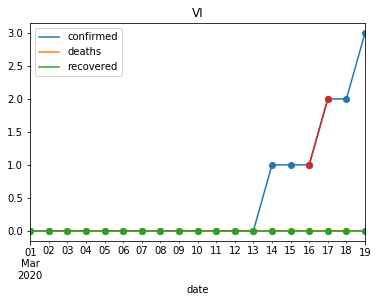

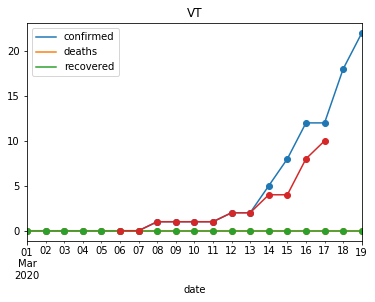

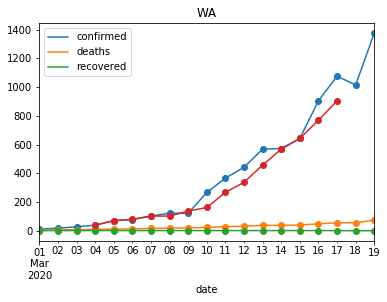

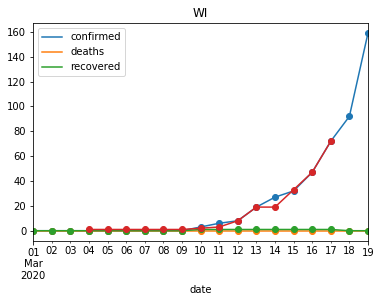

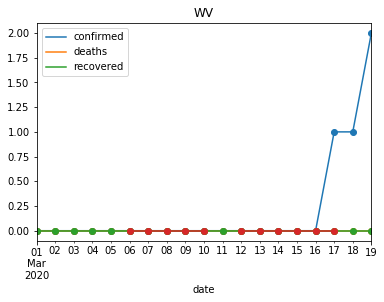

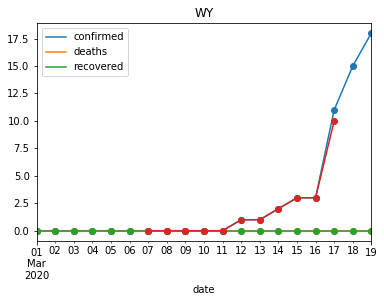

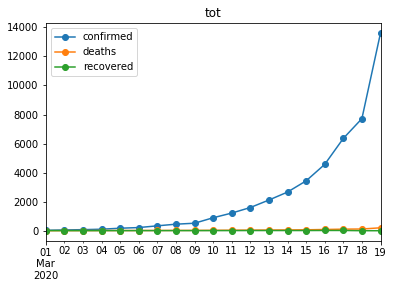

In [17]:
for state in US.columns.unique(level=0):
    US[state][start:].plot(style='o-')
    df = load_state(state)
    if not df.empty:
        df.plot(style='o-')
    plt.title(state)
    plt.show()

413.0
59
59
413.0


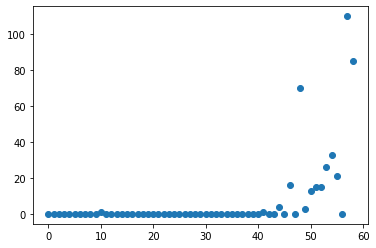

In [59]:
import jhu
import matplotlib.pyplot as plt
import numpy as np

US = jhu.load_us()

y = US['MA']['confirmed'].diff().to_numpy()

y[np.isnan(y)] = 0
y[y < 0] = 0

print(np.nansum(y))
print(len(y))

def smooth(y, w):
    filt = np.ones(w)/w
    y_pad = np.pad(y, (0, w-1), 'edge')
    return np.convolve(y_pad, filt, mode='valid')

y = smooth(y, 1)
plt.plot(y, 'o')

print(len(y))
print(np.nansum(y))


In [46]:
x = np.array([1, 2, 3])
np.pad(x, (3, 3), 'edge')

array([1, 1, 1, 1, 2, 3, 3, 3, 3])